In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
# dir(sql)

In [3]:
#connection
conn = sql.connect('Employees.sqlite')
conn

In [6]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

GROUP BY --- HAVING

GROUP BY works after the WHERE clause filters the rows and before the HAVING clause filters the groups.

In [30]:
#Count Employees by JobTitle

q = '''select count(employeename) as Employee, Jobtitle from Salaries
    group by jobtitle
    order by 1
    desc limit 10
    '''

sql_query(q)

,Employee,JobTitle
0,7036,Transit Operator
1,4389,Special Nurse
2,3736,Registered Nurse
3,2518,Public Svc Aide-Public Works
4,2421,Police Officer 3
5,2418,Custodian
6,2388,TRANSIT OPERATOR
7,2359,Firefighter
8,1971,Recreation Leader
9,1945,Patient Care Assistant


<Axes: xlabel='JobTitle'>

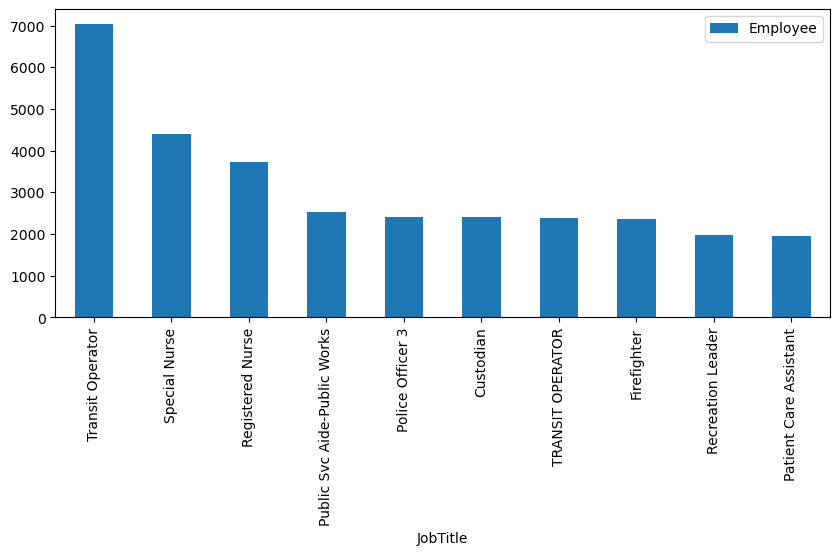

In [31]:
#graph
b = pd.read_sql_query(q,conn)
b.plot(kind='bar', x='JobTitle' , y='Employee', figsize=(10,4))

In [10]:
#count of employees per year

q= '''select count(employeename) as Employee_per_year, year from salaries
    group by 2 order by 1 desc'''

sql_query(q)

,Employee_per_year,Year
0,38123,2014
1,37606,2013
2,36766,2012
3,36159,2011


In [11]:
# Average TotalPay by JobTitle

q = '''select avg(totalpay) AverageTotalPay, Jobtitle from Salaries
    group by 1'''

sql_query(q)

DatabaseError: Execution failed on sql 'select avg(totalpay) AverageTotalPay, Jobtitle from Salaries
    group by 1': aggregate functions are not allowed in the GROUP BY clause

In [12]:
# Average TotalPay by JobTitle

q = '''select avg(totalpay) AverageTotalPay, Jobtitle from Salaries
    group by 2'''

sql_query(q)

,AverageTotalPay,JobTitle
0,44035.664337,ACCOUNT CLERK
1,47429.268000,ACCOUNTANT
2,29031.742917,ACCOUNTANT INTERN
3,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)"
4,67594.400000,ACUPUNCTURIST
...,...,...
2154,52705.880385,X-RAY LABORATORY AIDE
2155,50823.942700,X-Ray Laboratory Aide
2156,53632.870000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2157,41414.307500,Youth Comm Advisor


In [13]:
# Employees with the Highest TotalPay in Each Year

q='''select max(totalpay) as HighestPay, year, employeename from Salaries
group by 2 order by 1 desc'''

sql_query(q)

,HighestPay,Year,EmployeeName
0,567595.43,2011,NATHANIEL FORD
1,471952.64,2014,David Shinn
2,362844.66,2012,Gary Altenberg
3,347102.32,2013,Samson Lai


In [14]:
# Sum of TotalPay by Year and JobTitle

q = '''select sum(totalpay) as Total, year, jobtitle from Salaries
    group by 2'''

sql_query(q)

,Total,Year,JobTitle
0,2.594195e+09,2011,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,2.724848e+09,2012,"Lieutenant, Fire Suppression"
2,2.918656e+09,2013,Chief of Police
3,2.876911e+09,2014,Deputy Chief 3


In [15]:
# Sum of TotalPay by Year and JobTitle

q = '''select sum(totalpay) as Total, year, jobtitle from Salaries
    group by year, jobtitle'''

sql_query(q)

,Total,Year,JobTitle
0,3654960.14,2011,ACCOUNT CLERK
1,237146.34,2011,ACCOUNTANT
2,1393523.66,2011,ACCOUNTANT INTERN
3,67594.40,2011,ACUPUNCTURIST
4,5947802.68,2011,ADMINISTRATIVE ANALYST
...,...,...,...
4132,190575.90,2014,Wire Rope Cable Maint Sprv
4133,340136.68,2014,Worker's Comp Supervisor 1
4134,1836547.84,2014,Worker's Compensation Adjuster
4135,1792404.84,2014,X-Ray Laboratory Aide


In [16]:
#How many job titles have an (average TotalPay) greater than $250,000?

q = '''select count(jobtitle) JobtitleCount, avg(totalpay) AverageTotalPay from salaries
    where AverageTotalPay > 250000
    group by 1'''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(jobtitle) JobtitleCount, avg(totalpay) AverageTotalPay from salaries
    where AverageTotalPay > 250000
    group by 1': aggregate functions are not allowed in the GROUP BY clause

In [20]:
#How many job titles have an (average TotalPay) greater than $250,000?

q = '''select count(jobtitle) Count, Jobtitle, avg(totalpay) AverageTotalPay 
    from salaries
    group by 2
    having AverageTotalPay > 250000
    order by 3 desc'''

sql_query(q)

,Count,JobTitle,AverageTotalPay
0,2,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,1,Chief Investment Officer,339653.700000
2,3,Chief of Police,329183.646667
3,3,"Chief, Fire Department",325971.683333
4,1,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
5,1,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
6,3,"Gen Mgr, Public Trnsp Dept",297769.413333
7,18,Asst Chf of Dept (Fire Dept),281763.483889
8,3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
9,2,"Dep Dir for Investments, Ret",278592.545000


In [21]:
# Which jobtitles have more than 3 employees who earned totalpay over $200,000?

q = '''select jobtitle, count(employeename) Count, totalpay from Salaries
    where totalpay > 200000
    group by 1
    having Count > 3'''

sql_query(q)


,JobTitle,Count,TotalPay
0,ANESTHETIST,8,238879.20
1,ASSISTANT DEPUTY CHIEF II,4,316285.74
2,Anesthetist,33,249803.78
3,Assistant Chief Attorney 1,36,204674.60
4,Assistant Chief Attorney 2,11,214837.50
...,...,...,...
69,Sergeant 3,96,233985.76
70,Sheriff's Sergeant,6,217643.97
71,Supervising Physician Spec,33,214572.59
72,TRANSIT SUPERVISOR,7,230239.98


### case

Categorizing Employees Based on overtimepay > 100000 'overtime worker' else 'regular worker'

In [24]:
q = '''select employeename, overtimepay,
    case
    when overtimepay > 100000 then 'overtime worker'
    else 'regular worker'
    end as WorkCategory
    from Salaries'''

sql_query(q)

,EmployeeName,OvertimePay,WorkCategory
0,NATHANIEL FORD,0,regular worker
1,GARY JIMENEZ,245131.88,overtime worker
2,ALBERT PARDINI,106088.18,overtime worker
3,CHRISTOPHER CHONG,56120.71,regular worker
4,PATRICK GARDNER,9737,regular worker
...,...,...,...
148649,Roy I Tillery,0,regular worker
148650,Not provided,Not Provided,overtime worker
148651,Not provided,Not Provided,overtime worker
148652,Not provided,Not Provided,overtime worker


Categorizing Job Titles Based on totalpay > 100000 'executive level', > 50k and < 99999 'management level' , else 'officer level'

In [25]:
q = '''select * from Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


Categorizing Employees Based on BasePay > 100000 'high paying job', between 50k to 99999 'medium paying job', else 'low paying job'

### UPDATE
update table_name set value where...

In [26]:
q = '''update Salaries set totalpay = '0'
    where EmployeeName	= 'NATHANIEL FORD'
'''

conn.execute(q)

In [27]:
q = '''select * from Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,0.00,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [28]:
q = '''update Salaries set totalpay = '0', BasePay='0', OtherPay='0'
    where EmployeeName	= 'NATHANIEL FORD'
'''

conn.execute(q)

In [29]:
q = '''select * from Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,0,0,0,,0.00,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
